In [1]:
import networkx as nx
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt

import pickle as pkl
from matplotlib.ticker import StrMethodFormatter

%load_ext autoreload
%autoreload 2

SEED = 181731

In [69]:
def plotRegrets(allRegrets, titles=None, save_fig=None,legend = True,labels = None,legend_font = 16,plot_error = ['Our Algorithm']):
    """
    param allRegrets: list of dictionaries of regrets(samples, time_steps) for various algorithms and runs
    """
    nPlots = len(allRegrets)
    
    plt.style.use('seaborn-whitegrid')
    plt.rc('font',weight='bold')
    # sns.set()
    
    if labels is None:
        labels = {'greedy': 'Local $\epsilon$-greedy', 'thompson': 'Local TS', 'UCB': 'Local UCB','Q_learning': r'QL-$\epsilon$ greedy',\
                  'Our Algorithm':'G-UCB','UCRL2':'UCRL2','QL_UCB_H':'QL-UCB-H'}
    styles = {'greedy': 'dashed', 'thompson': 'dashed', 'UCB': 'dashed','Q_learning': 'dotted',\
              'Our Algorithm':'solid','UCRL2':'solid','QL_UCB_H':'dotted'}
    colors = {'greedy': 'b', 'thompson': 'y', 'UCB': 'mediumseagreen','Q_learning': 'orange',\
              'Our Algorithm':'b','UCRL2':'cadetblue','QL_UCB_H':'blue'}
    keys = allRegrets[0].keys()
    

    lw = 6

    if nPlots == 1:
        regrets = allRegrets[0]
        for i, key in enumerate(keys):
            regret = regrets[key]
            regret = np.cumsum(regret, axis=1)
            # regret = np.mean(regret, axis=0)
            if key in plot_error:
              
                sd = np.std(regret,axis=0)
                regret = np.mean(regret,axis=0)


                plt.errorbar(range(1,len(regret)+1), regret ,sd,errorevery=int(len(regret)/6),\
                             c=colors[key], linestyle = styles[key], label=labels[key],linewidth=lw,\
                            capsize=5,elinewidth=4)
            
            else:
                regret = np.mean(regret,axis=0)
                plt.plot([i for i in range(1,len(regret)+1)],regret, c=colors[key], linestyle = styles[key], label=labels[key],\
                        linewidth=lw)
            
        if titles is not None:    
            plt.title(titles[0])
     
    fs = 30
    if legend:
        plt.legend(fontsize=legend_font)
        # plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(.5, 1.52), fontsize=20)
    plt.ylabel('Regret', fontsize=fs,fontweight='bold')
        
    plt.gca().ticklabel_format(scilimits=(0,2),useMathText=True) # No decimal places
    
    plt.xlabel('$t$', fontsize=fs)
    plt.gca().yaxis.get_offset_text().set_fontsize(fs)
    plt.gca().xaxis.get_offset_text().set_fontsize(fs)
    plt.tick_params(labelsize=fs)
    # plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
    if save_fig is not None:
        plt.savefig('Figures/'+save_fig, bbox_inches = 'tight')
    plt.show()

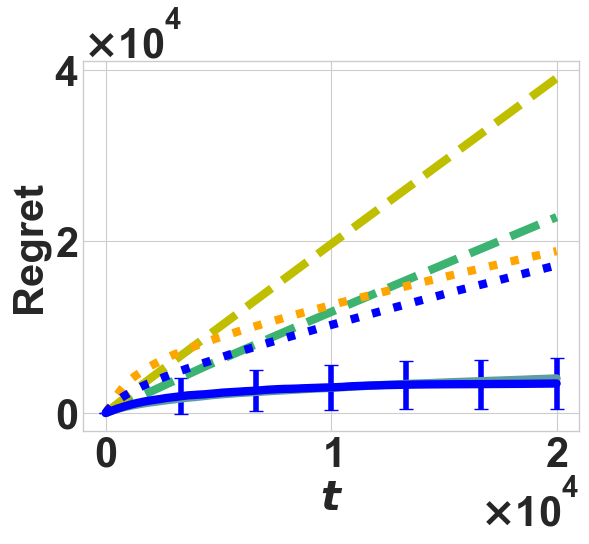

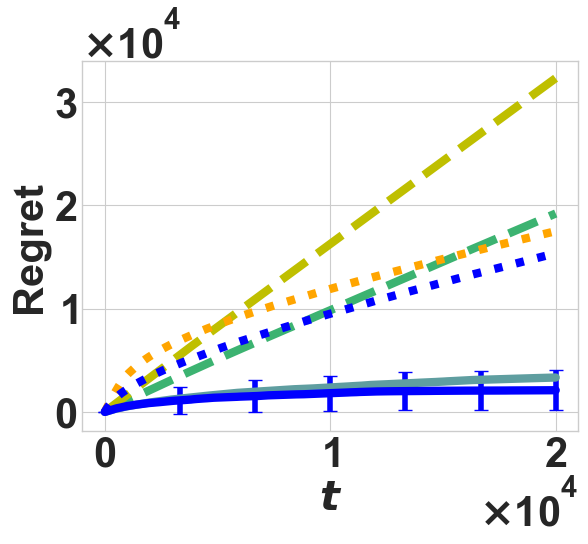

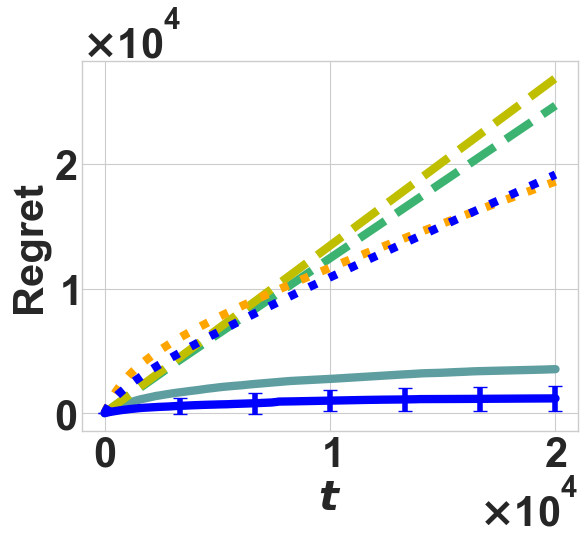

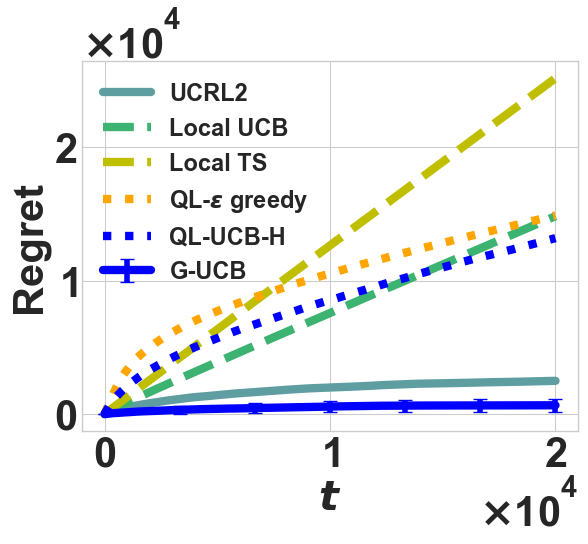

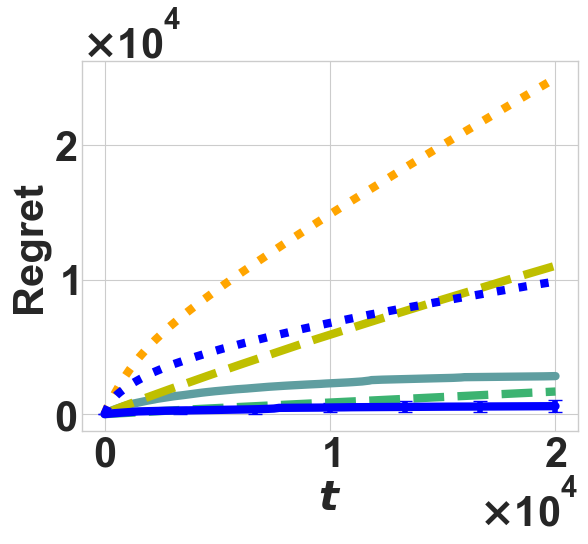

In [70]:
# Plot all algorithms on all graphs except FC
graphs = ['line','circle','tree','grid','star']
legend = {g:False for g in graphs}
legend['grid']= True
# labels = { 'thompson': 'TS', 'UCB': 'UCB',
#                   'Our Algorithm':'G-UCB'}
labels = None
to_plot_names = ['Our Algorithm','UCRL2','UCB','thompson','Q_learning','QL_UCB_H']
for g in graphs:
    with open('Data/{}_large.pkl'.format(g), 'rb') as file:
        data = pkl.load(file)
    
    to_plot_data = {name:data[name] for name in to_plot_names}
    
    plt.figure(dpi=100)
    plotRegrets([to_plot_data], [''],'Benchmarks/{}.png'.format(g),legend=legend[g],labels = labels,legend_font=17)
    # except:
    #     pass

# Plot FC graph for G-UCB, UCB, TS only.

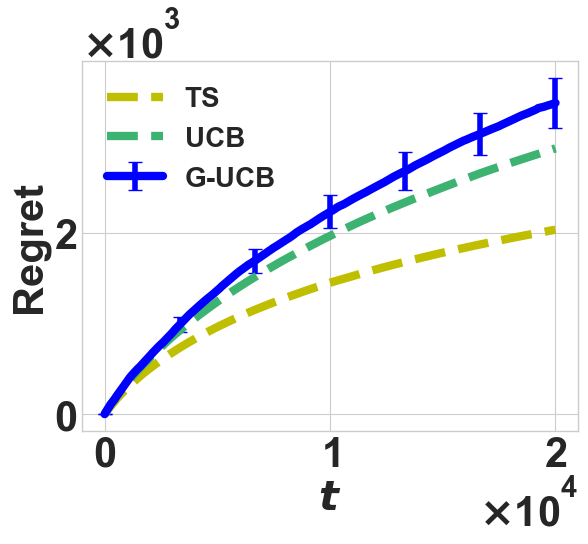

In [66]:

graphs = ['fully_connected']
legend = {}
legend['fully_connected']= True
labels = { 'thompson': 'TS', 'UCB': 'UCB',
                  'Our Algorithm':'G-UCB'}

to_plot_names = ['Our Algorithm','thompson','UCB']

for g in graphs:
    
    # try:
    with open('Data/{}_large.pkl'.format(g), 'rb') as file:
        data = pkl.load(file)

    to_plot_data = {name:data[name] for name in to_plot_names}
    
    plt.figure(dpi=100)
    plotRegrets([to_plot_data], [''],'Benchmarks/{}.png'.format(g),legend=legend[g],labels = labels,legend_font = 20)
    # except:
    #     pass

# Plot graph comparing G-UCB and UCRL2 only on all graphs

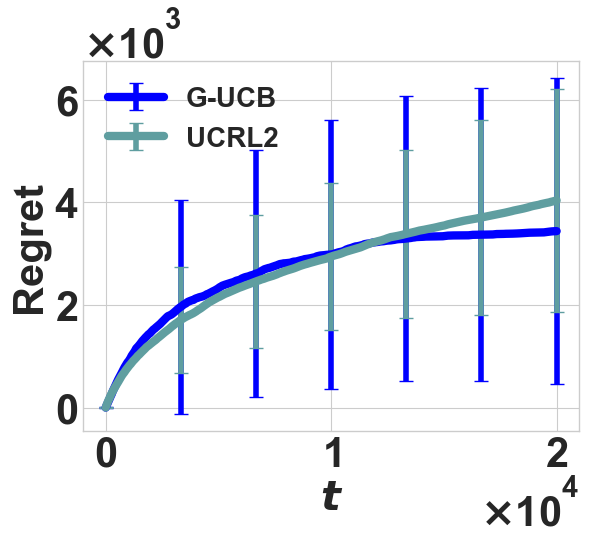

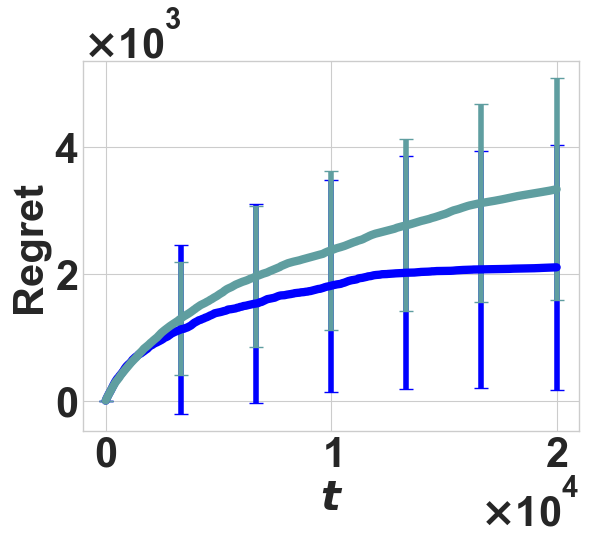

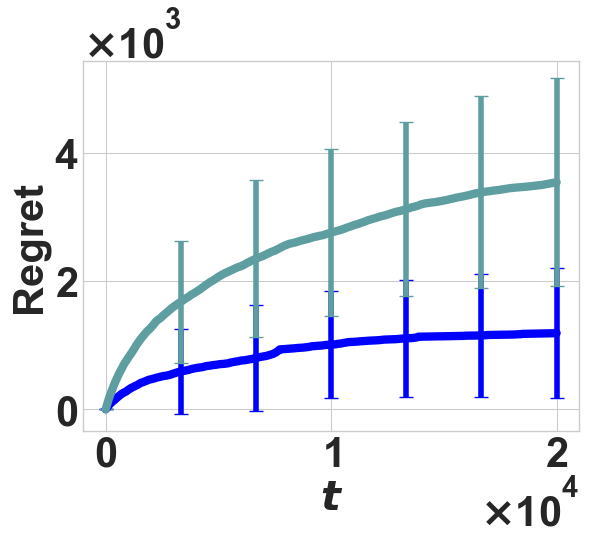

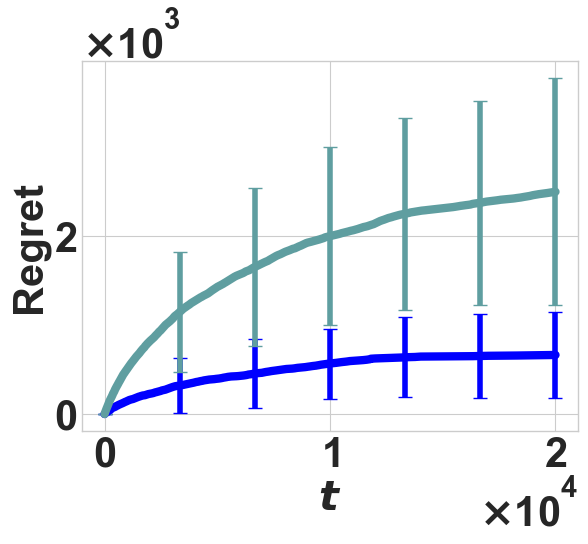

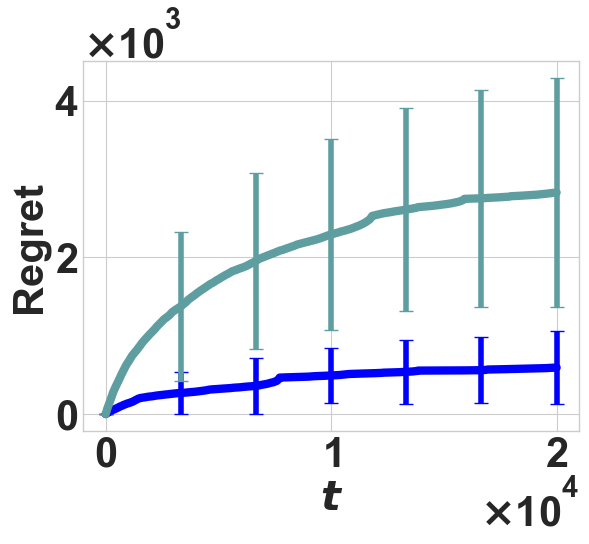

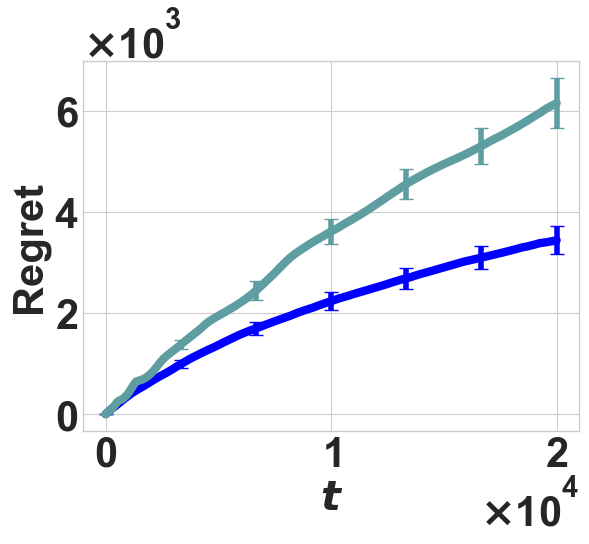

In [73]:

graphs = ['line','circle','tree','grid','star','fully_connected']
legend = {g:False for g in graphs}
legend['line']= True
# labels = { 'thompson': 'TS', 'UCB': 'UCB',
#                   'Our Algorithm':'G-UCB'}
labels = None
to_plot_names = ['Our Algorithm','UCRL2']
for g in graphs:
    with open('Data/{}_large.pkl'.format(g), 'rb') as file:
        data = pkl.load(file)
    
    to_plot_data = {name:data[name] for name in to_plot_names}
    
    plt.figure(dpi=100)
    plotRegrets([to_plot_data], [''],'vsUCRL2/{}_vsUCRL2.png'.format(g),\
                legend=legend[g],labels = labels,legend_font=20,\
               plot_error = ['Our Algorithm', 'UCRL2'])